# 1. Cities in Sweden - create dataset (*)  
Create this DataFrame from scratch:  

Kommun	Population  
0	Malmö	347949  
1	Stockholm	975551  
2	Uppsala	233839  
3	Göteborg	583056  

In [253]:
import pandas as pd

data_dict = {'Kommun':['Malmö', 'Stockholm', 'Uppsala', 'Göteborg'], 'Population': [347949, 975551, 233839, 583056]}
df_city_pop = pd.DataFrame(data=data_dict)
df_city_pop

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


---
## a) 
Use your DataFrame to print out all the cities

In [254]:
# a) Use your DataFrame to print out all the cities
print(", ".join(df_city_pop["Kommun"]))

Malmö, Stockholm, Uppsala, Göteborg


---
## b) 
Select only the row which contains Göteborg. Do this by using the name Göteborg

In [255]:
df_city_pop["Kommun"] == "Göteborg" # returns true for row matching value of "Göteborg" in column "Kommun" - Use this in next cell:

0    False
1    False
2    False
3     True
Name: Kommun, dtype: bool

In [256]:
# b) Select only the row which contains Göteborg. Do this by using the name Göteborg
df_city_pop[df_city_pop["Kommun"] == "Göteborg"] # to get values of the entire row

,Kommun,Population
3,Göteborg,583056


---
## c) 
Sort the cities by population from largest to smallest

In [257]:
df_city_pop.sort_values(by = "Population", ascending = False, inplace = True)
df_city_pop

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


---
## d) 
Filter out the three largest cities

In [258]:
# d) Filter out the three largest cities
df_city_pop.tail(-3)

,Kommun,Population
2,Uppsala,233839


---
## e) 
The whole population in Sweden 2020 is 10379295   
Use this number to create a new column in your sorted DataFrame named: Population (%)  
This column should be filled with percentage of the Swedish population for each city  

In [259]:
df_city_pop["Population (%)"] = ((df_city_pop["Population"] / 10379295)*100).round(2)
df_city_pop

,Kommun,Population,Population (%)
1,Stockholm,975551,9.40
3,Göteborg,583056,5.62
0,Malmö,347949,3.35
2,Uppsala,233839,2.25


# 2. Cities in Sweden - real dataset (*)

Go into [this page][scb_pop50], scroll down and download the Excel file containing Swedish population dataset from SCB.

[scb_pop50]: https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/topplistor-kommuner/folkmangd-topp-50/

---
## &nbsp; a) 
Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "../Data/komtopp50_2020.xlsx"
df = pd.read_excel(file_path, sheet_name = "Totalt")
df.head(7)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Folkmängd per kommun 31 december 2020 jämfört ...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring
5,2020,2019.0,NaN,2020,2019.0,%
6,83,84.0,Ale,31868,31402.0,1.483982


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    object 
 1   Unnamed: 1  291 non-null    float64
 2   Unnamed: 2  291 non-null    object 
 3   Unnamed: 3  292 non-null    object 
 4   Unnamed: 4  291 non-null    float64
 5   Unnamed: 5  292 non-null    object 
dtypes: float64(2), object(4)
memory usage: 14.0+ KB


In [262]:
df.describe()

,Unnamed: 1,Unnamed: 4
count,291.000000,291.000000
mean,151.934708,35496.934708
std,138.092769,74190.464321
min,1.000000,2019.000000
25%,73.500000,10005.000000
50%,146.000000,15940.000000
75%,218.500000,35649.500000
max,2019.000000,974073.000000


---
## &nbsp; b) 
Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |


In [263]:
df = df.rename(columns = {"Unnamed: 0": "Rang2020",
                    "Unnamed: 1": "Rang 2019",
                    "Unnamed: 2": "Kommun",
                    "Unnamed: 3": "Folkmängd 2020",
                    "Unnamed: 4": "Folkmängd 2019",
                    "Unnamed: 5": "Förändring"}) # rename columns using dict of {old: new}

df = df.drop(df.index[0:6]) # drop all rows from 0-6
df.reset_index(drop = True, inplace = True) # reset index count to start from 0, drop old index count
df # use inplace = True to mutate values of original DataFram object, otherwise do df_new = df_old

,Rang2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84.0,Ale,31868,31402.0,1.483982
1,64,64.0,Alingsås,41602,41420.0,0.439401
2,123,123.0,Alvesta,20224,20134.0,0.447005
3,255,255.0,Aneby,6821,6848.0,-0.394276
4,169,167.0,Arboga,14039,14087.0,-0.34074
...,...,...,...,...,...,...
285,54,55.0,Österåker,46644,45574.0,2.34783
286,116,115.0,Östhammar,22251,22250.0,0.004494
287,160,159.0,Östra Göinge,15017,15007.0,0.066636
288,284,284.0,Överkalix,3289,3315.0,-0.784314


---
## c) 
Sort the cities by population from largest to smallest

In [264]:
df_sorted = df.sort_values("Folkmängd 2020", ascending = False)
df_sorted

,Rang2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1.0,Stockholm,975551,974073.0,0.151734
57,2,2.0,Göteborg,583056,579281.0,0.65167
134,3,3.0,Malmö,347949,344166.0,1.099179
241,4,4.0,Uppsala,233839,230767.0,1.331213
124,5,5.0,Linköping,164616,163051.0,0.959822
...,...,...,...,...,...,...
271,286,286.0,Åsele,2805,2794.0,0.393701
5,287,287.0,Arjeplog,2718,2785.0,-2.405745
29,288,288.0,Dorotea,2498,2551.0,-2.077617
194,289,289.0,Sorsele,2442,2489.0,-1.888309


---
## d) 
Filter out the five smallest cities

In [265]:
df_sorted_exclude_smallest = df_sorted.head(-5)
df_sorted_exclude_smallest

,Rang2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1.0,Stockholm,975551,974073.0,0.151734
57,2,2.0,Göteborg,583056,579281.0,0.65167
134,3,3.0,Malmö,347949,344166.0,1.099179
241,4,4.0,Uppsala,233839,230767.0,1.331213
124,5,5.0,Linköping,164616,163051.0,0.959822
...,...,...,...,...,...,...
157,281,281.0,Norsjö,3945,3986.0,-1.0286
265,282,282.0,Ydre,3726,3747.0,-0.560448
146,283,283.0,Munkfors,3725,3740.0,-0.40107
288,284,284.0,Överkalix,3289,3315.0,-0.784314


---
## e) 
Use the DataFrame to calculate Sweden's population in 2019 and 2020

In [266]:
pop2020 = sum(df_sorted["Folkmängd 2020"])
pop2020

10379295

In [267]:
pop2019 = sum(df_sorted["Folkmängd 2019"])
pop2019

10327589.0

---
## f) 
Plot a bar chart for the five largest cities and the five smallest cities

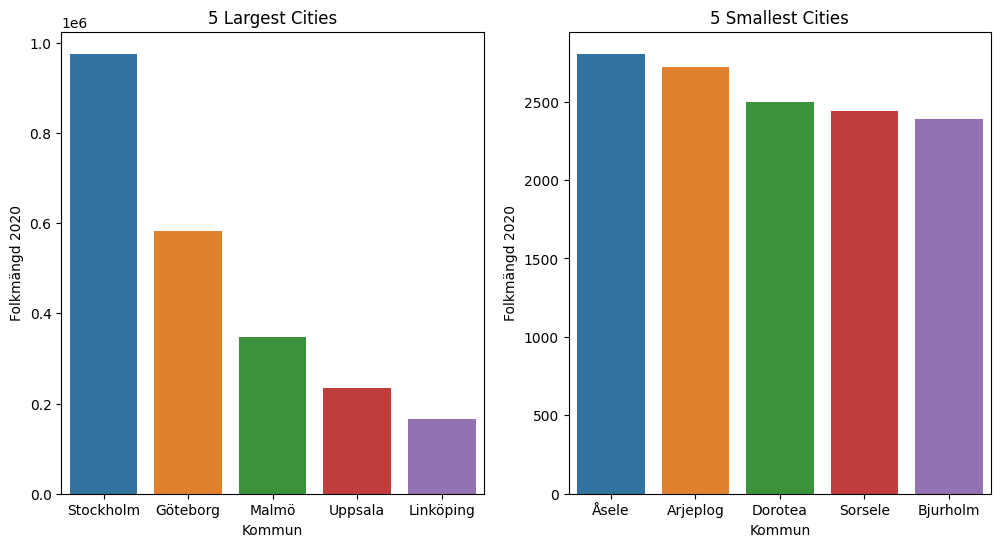

In [268]:
import matplotlib.pyplot as plt

df_largest = df_sorted.head()
df_smallest = df_sorted.tail()

fig, ax = plt.subplots(1,2, figsize = (12, 6))

data_frames = (df_largest, df_smallest)
titles = ("5 Largest Cities", "5 Smallest Cities")
x_columns = ["Kommun", "Kommun"]

for i, (data_frame, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data = data_frame, x = x_columns[i], y = "Folkmängd 2020", ax = ax[i])
    ax[i].set(title = title)

# 3. Cities in Sweden - gender (*)
We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames.  
In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

In [269]:
df_total = df_sorted
df_total

file_path = "../Data/komtopp50_2020.xlsx"
sheet_names = ["Kvinnor", "Män"]

df_dict = pd.read_excel(file_path, sheet_name = sheet_names, skiprows = 6) # or header # NOTE: can specify separator
df_dict["Män"].head(7)

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,81,83,Ale,16256,16054,1.258253
1,64,64,Alingsås,20702,20646,0.271239
2,122,123,Alvesta,10367,10339,0.270819
3,255,255,Aneby,3503,3498,0.142939
4,169,168,Arboga,7094,7114,-0.281136
5,287,286,Arjeplog,1426,1458,-2.194787
6,262,262,Arvidsjaur,3168,3182,-0.439975


---
## a) 
Clean your data so that the head looks like this: (*)

Male: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 |          81 |          83 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 |          64 |          64 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|  2 |         122 |         123 | Alvesta  |            10367 |            10339 |     0.270819 | Man   |
|  3 |         255 |         255 | Aneby    |             3503 |             3498 |     0.142939 | Man   |
|  4 |         169 |         168 | Arboga   |             7094 |             7114 |    -0.281136 | Man   |

Female: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:-------|
|  0 |          84 |          85 | Ale      |            15612 |            15348 |     1.72009  | Kvinna |
|  1 |          64 |          64 | Alingsås |            20900 |            20774 |     0.606527 | Kvinna |
|  2 |         123 |         123 | Alvesta  |             9857 |             9795 |     0.632976 | Kvinna |
|  3 |         255 |         255 | Aneby    |             3318 |             3350 |    -0.955224 | Kvinna |
|  4 |         165 |         164 | Arboga   |             6945 |             6973 |    -0.401549 | Kvinna |


In [270]:
df_dict["Kvinnor"].head(1)

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,84,85,Ale,15612,15348,1.720094


In [271]:
for sheet_name in df_dict:  # updating missing column name of all DataFrames in dict:
    df_dict[sheet_name].rename(
        columns={
            2020: "Rang 2020",
            2019: "Rang 2019", 
            "Unnamed: 2": "Kommun",
            "2020.1": "Folkmängd 2020",
            "2019.1": "Folkmängd 2019",
            "%": "Förändring",
        },
        inplace=True,
    )
    df_dict[sheet_name]["Kön"] = sheet_name

df_dict["Kvinnor"].head(1)


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,84,85,Ale,15612,15348,1.720094,Kvinnor


In [272]:
# %%timeit
# name_list = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring (%)"]
# for key, value in df_dict.items():
#     for i, n in enumerate(value.columns):
#         value.rename(columns={n: name_list[i]}, inplace = True)
#     value["Kön"] = key
# df_dict["Kvinnor"].head(1)

---
## b) 
Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  (*)

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |

In [273]:
df = pd.concat([df_dict["Kvinnor"], df_dict["Män"]]).drop(["Rang 2020", "Rang 2019"], axis = "columns")
df.head(1)

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,Ale,15612,15348,1.720094,Kvinnor


---
## c) 
Extract and change column name from the total DataFrame so that the head look like this: (*) 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |

In [274]:
df_total.head(1)

,Rang2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1.0,Stockholm,975551,974073.0,0.151734


In [275]:
df_total = df_total.rename(columns = {"Folkmängd 2020": "Total Pop 2020", "Folkmängd 2019": "Total Pop 2019", "Förändring": "Total Förändring"}).drop(["Rang2020", "Rang 2019"], axis = "columns")
df_total.head(5)

,Kommun,Total Pop 2020,Total Pop 2019,Total Förändring
198,Stockholm,975551,974073.0,0.151734
57,Göteborg,583056,579281.0,0.65167
134,Malmö,347949,344166.0,1.099179
241,Uppsala,233839,230767.0,1.331213
124,Linköping,164616,163051.0,0.959822


---
## d) 
Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

In [276]:
df = df.merge(df_total).sort_values(by = "Total Pop 2020", ascending = False, ignore_index = True)
df.head()

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total Förändring
0,Stockholm,492569,491853,0.145572,Kvinnor,975551,974073.0,0.151734
1,Stockholm,482982,482220,0.158019,Män,975551,974073.0,0.151734
2,Göteborg,292505,290308,0.756782,Män,583056,579281.0,0.65167
3,Göteborg,290551,288973,0.546072,Kvinnor,583056,579281.0,0.65167
4,Malmö,172538,170623,1.122357,Män,347949,344166.0,1.099179


---
## e) 
Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities

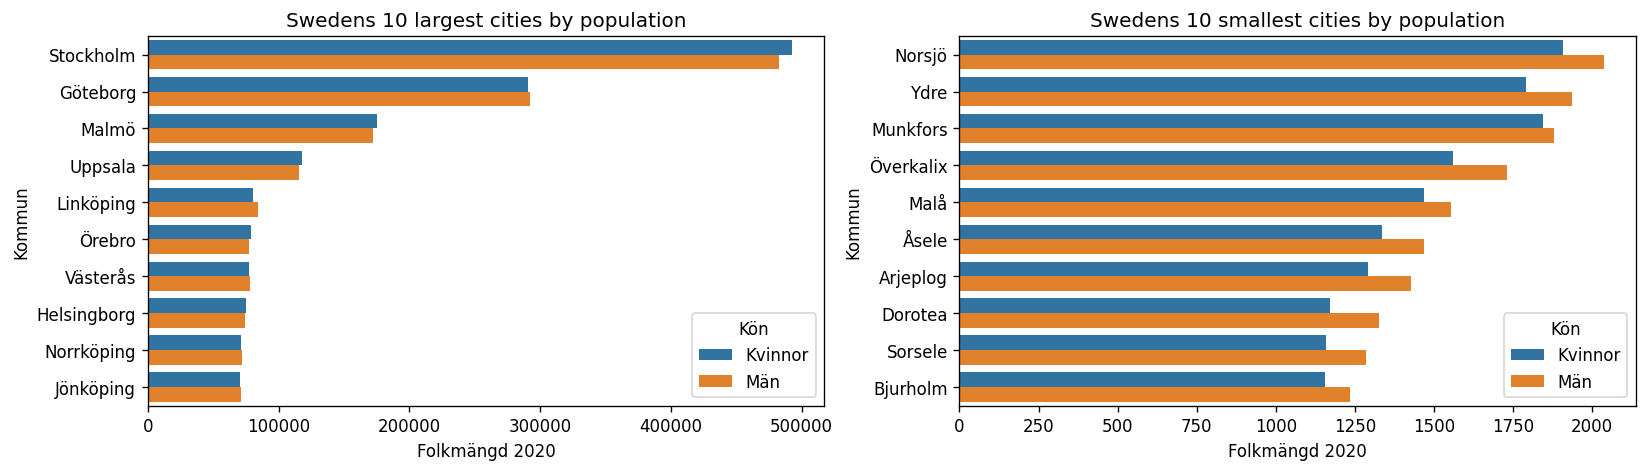

In [277]:
data = [df.head(20), df.tail(20)]
titles = ["Swedens 10 largest cities by population", "Swedens 10 smallest cities by population"]
fig, ax = plt.subplots(1,2, figsize = (16, 4), dpi = 120)

for i, (datapoint, title) in enumerate(zip(data, titles)):
    sns.barplot(data = datapoint, x = "Folkmängd 2020", y = "Kommun", hue = "Kön", ax = ax[i])
    ax[i].set(title = title)

---
## f) 
Create a pie chart showing the total male and female population in Sweden 2020

In [278]:
#pop_dict = {"Män": 12123123, "Kvinnor": 123123}

x = df.groupby("Kön").sum("Folkmängd 2020")

x

,Folkmängd 2020,Folkmängd 2019,Total Pop 2019
Kön,,,
Kvinnor,5156448,5131775,10327589.0
Män,5222847,5195814,10327589.0


In [279]:
x["Folkmängd 2020"]

Kön
Kvinnor    5156448
Män        5222847
Name: Folkmängd 2020, dtype: int64

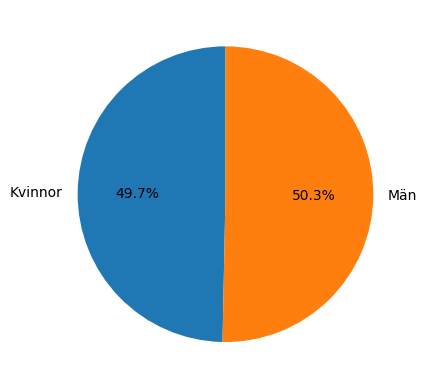

In [280]:
plt.pie(x = x["Folkmängd 2020"], labels = x.index, autopct="%0.1f%%", startangle = 90);

---
## g) 
Create a barplot showing the cities with the five largest percentual gender difference in 2020

In [281]:
df.info() # some datatypes are not as expected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kommun            580 non-null    object 
 1   Folkmängd 2020    580 non-null    int64  
 2   Folkmängd 2019    580 non-null    int64  
 3   Förändring        580 non-null    object 
 4   Kön               580 non-null    object 
 5   Total Pop 2020    580 non-null    object 
 6   Total Pop 2019    580 non-null    float64
 7   Total Förändring  580 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 36.4+ KB


In [282]:
df[df["Förändring"] == "."] = 0.0 # TODO: how to find this dot without manual search?

In [283]:
# changing datatypes to expected type:
df["Förändring"] = df["Förändring"].astype(float)
df["Total Pop 2020"] = df["Total Pop 2020"].astype(int)
df["Total Pop 2019"] = df["Total Pop 2019"].astype(int)
df["Total Förändring"] = df["Total Förändring"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kommun            580 non-null    object 
 1   Folkmängd 2020    580 non-null    int64  
 2   Folkmängd 2019    580 non-null    int64  
 3   Förändring        580 non-null    float64
 4   Kön               580 non-null    object 
 5   Total Pop 2020    580 non-null    int32  
 6   Total Pop 2019    580 non-null    int32  
 7   Total Förändring  580 non-null    float64
dtypes: float64(2), int32(2), int64(2), object(2)
memory usage: 31.8+ KB


In [296]:
a = df.groupby("Kommun")["Förändring"]
a

---
## h) 
Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020

---
## i) 
Feel free to investigate other questions you are interested in using these datasets